In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_df = pd.read_csv(r'C:\Users\spars\Desktop\train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1. Who were the passengers on the ship (Age, Sex, Class etc.)

In [5]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\spars\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


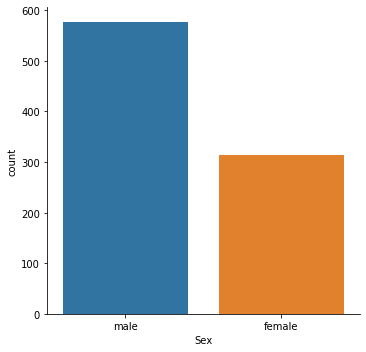

In [6]:
sns.factorplot('Sex',data=titanic_df, kind='count')

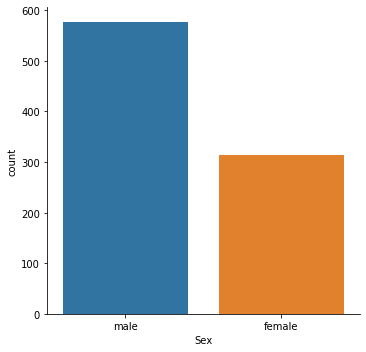

In [7]:
# factorplot is deprecated. Use catplot and mention 'kind=count' in the argument.
sns.catplot('Sex', data=titanic_df,kind='count')

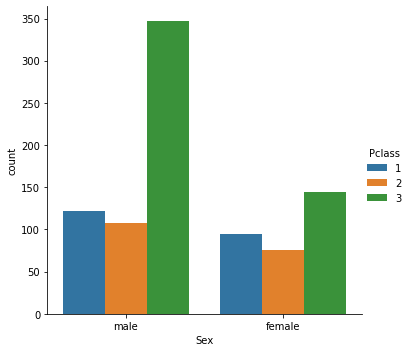

In [8]:
# Plotting classes
sns.catplot('Sex',data=titanic_df, kind = 'count',hue='Pclass')

In [9]:
titanic_df['Sex'].groupby(titanic_df['Pclass']).value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

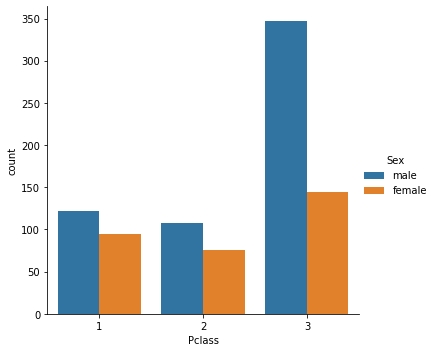

In [10]:
# Another way of plotting the graph
sns.catplot('Pclass',data=titanic_df, kind = 'count',hue='Sex')

In [11]:
titanic_df['Pclass'].groupby(titanic_df['Sex']).value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

### Finding the split between males, females and children

In [12]:
def male_female_child(passenger): # defined a function with passenger as the argument
    age,sex=passenger  # takes age and sex of the passenger as the input
    if age<16:
        return 'child' 
    else:
        return sex # if age is less than 16, return child, else return male/female 

In [13]:
# A new column 'person' is created by applying this function

titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [14]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

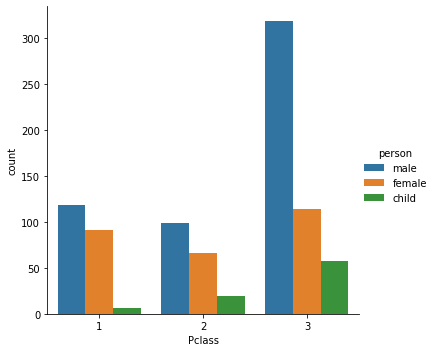

In [15]:
sns.catplot('Pclass',data=titanic_df,hue='person',kind='count')

In [16]:
titanic_df['person'].groupby(titanic_df['Pclass']).value_counts()

Pclass  person
1       male      119
        female     91
        child       6
2       male       99
        female     66
        child      19
3       male      319
        female    114
        child      58
Name: person, dtype: int64

C:\Users\spars\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\spars\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([14., 10.,  6., 10.,  7.,  3.,  4.,  8.,  2.,  4.,  1.,  8.,  6.,
        17., 13., 26., 25., 16., 51., 15., 31., 24., 18., 18., 27., 20.,
        44., 18., 17., 16., 18., 23.,  6., 25., 13.,  8., 13.,  5.,  9.,
        14., 12.,  9.,  6., 10.,  7.,  6.,  1.,  8.,  7.,  2.,  5.,  2.,
         4.,  3.,  4.,  4.,  3.,  1.,  0.,  0.,  0.,  3.,  2.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.]),
 array([ 0.42      ,  1.55685714,  2.69371429,  3.83057143,  4.96742857,
         6.10428571,  7.24114286,  8.378     ,  9.51485714, 10.65171429,
        11.78857143, 12.92542857, 14.06228571, 15.19914286, 16.336     ,
        17.47285714, 18.60971429, 19.74657143, 20.88342857, 22.02028571,
        23.15714286, 24.294     , 25.43085714, 26.56771429, 27.70457143,
        28.84142857, 29.97828571, 31.11514286, 32.252     , 33.38885714,
        34.52571429, 35.66257143, 36.79942857, 37.93628571, 39.07314286,
        40.21      , 41.34685714, 42.48371429, 43.62057143, 44.75742857,
        45.89428

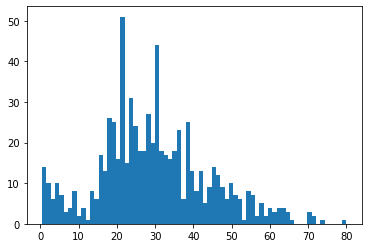

In [17]:
plt.hist('Age',data=titanic_df,bins=70)

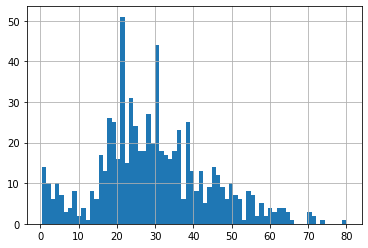

In [18]:
# An alternate method for the above

titanic_df['Age'].hist(bins=70)

In [19]:
titanic_df['Age'].mean()

29.69911764705882

### Overall comparison of male, female and child

In [20]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

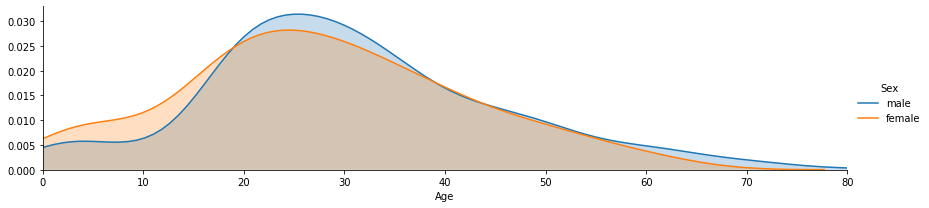

In [24]:
# Using facetgrid with seaborn along with the pandas dataframe.

fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True) # mapping the figure onto multiple kde plots by Age
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest)) # The max limit for age set at max. age of passenger. Also range starts from zero as age isn't -ve 
fig.add_legend()

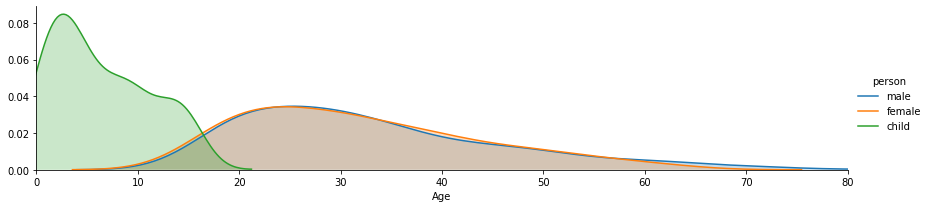

In [21]:
# Using the same as above but using the 'person' column

fig=sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True) # mapping the figure onto multiple kde plots by Age
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest)) # The max limit for age set at max. age of passenger. Also range starts from zero as age isn't -ve 
fig.add_legend()

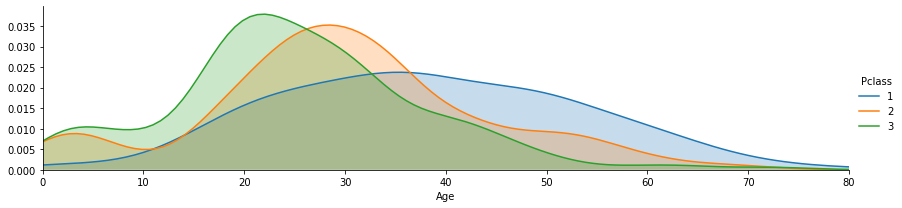

In [22]:
# kde plots for class with age
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True) # mapping the figure onto multiple kde plots by Age
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest)) # The max limit for age set at max. age of passenger. Also range starts from zero as age isn't -ve 
fig.add_legend()

### 2. Deck of passengers and its relation to their class

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [24]:
# Dropping the null cabin values
deck=titanic_df['Cabin'].dropna()  

In [26]:
levels=[]
for level in deck:
    levels.append(level[0])
cabin_df=DataFrame(levels)  # Created a dataframe
cabin_df.columns=['Cabin']

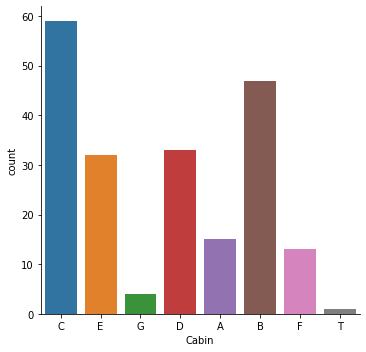

In [27]:
sns.catplot('Cabin',data=cabin_df,kind='count')

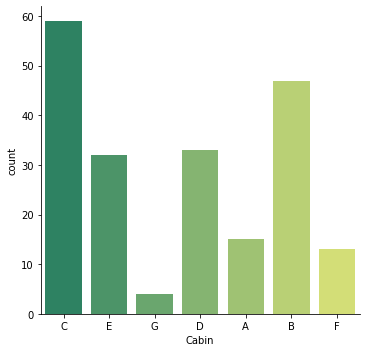

In [28]:
# Dropping the 'T' cabin as it has very few values
cabin_df=cabin_df[cabin_df.Cabin!='T']
sns.catplot('Cabin',data=cabin_df,palette='summer',kind='count')

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


### 3. Where did the people come from?

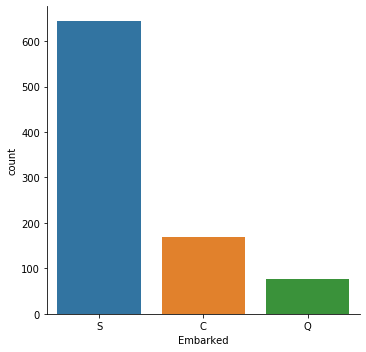

In [30]:
sns.catplot('Embarked',data=titanic_df,kind='count')

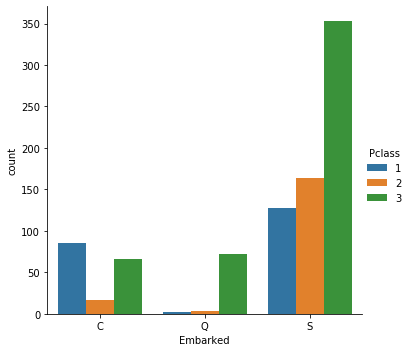

In [31]:
# Classwise division of cities
sns.catplot('Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])
# Shows that almost all of those boarding from Queenstown were in third class and most of the passengers were from Southampton.

In [32]:
titanic_df['Pclass'].groupby(titanic_df['Embarked']).value_counts()

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: Pclass, dtype: int64

### 4. Who was alone and who was with family?

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [34]:
# If the values of both 'SibSp' and 'Parch' add up to 0, then the person was travelling alone.
titanic_df['Alone'] = titanic_df['SibSp']+titanic_df['Parch']

In [36]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [40]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

C:\Users\spars\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


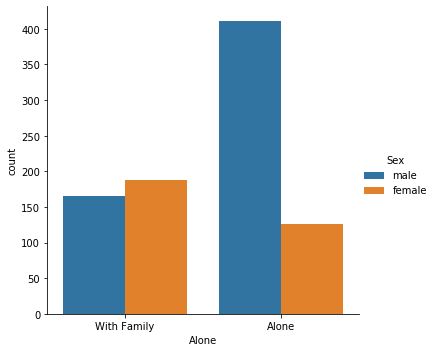

In [47]:
# Visualizing those that were alone and those that were with family
sns.catplot('Alone',data=titanic_df,kind='count',hue='Sex')

In [48]:
titanic_df['Alone'].groupby(titanic_df['Sex']).value_counts()

Sex     Alone      
female  With Family    188
        Alone          126
male    Alone          411
        With Family    166
Name: Alone, dtype: int64

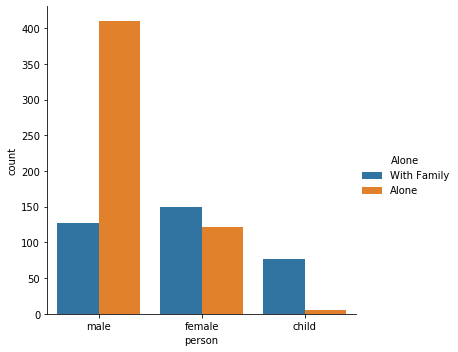

In [53]:
sns.catplot('person',data=titanic_df,kind='count',hue='Alone')

In [54]:
titanic_df['person'].groupby(titanic_df['Alone']).value_counts()

Alone        person
Alone        male      410
             female    121
             child       6
With Family  female    150
             male      127
             child      77
Name: person, dtype: int64

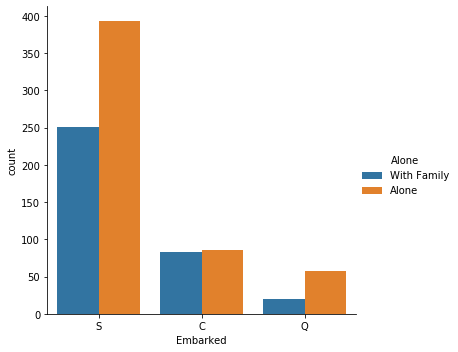

In [52]:
sns.catplot('Embarked',data=titanic_df,kind='count',hue='Alone')

In [55]:
titanic_df['Embarked'].groupby(titanic_df['Alone']).value_counts()

Alone        Embarked
Alone        S           393
             C            85
             Q            57
With Family  S           251
             C            83
             Q            20
Name: Embarked, dtype: int64

### 5. what factors help in the survival of a person in the event of a crash?

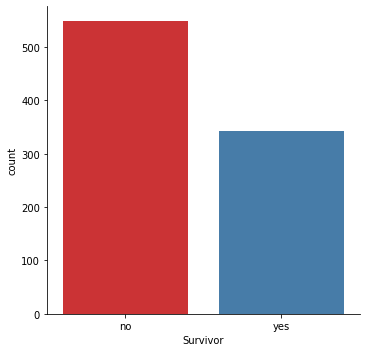

In [59]:
titanic_df['Survivor']= titanic_df['Survived'].map({0:'no',1:'yes'})

sns.catplot('Survivor',data=titanic_df,kind='count',palette='Set1')

#### Was class was one of the factors ?

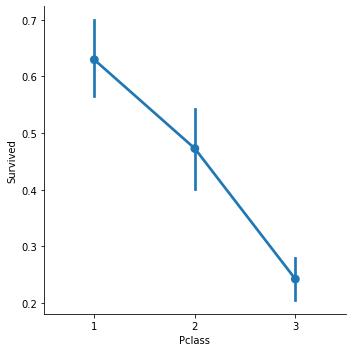

In [72]:
sns.factorplot('Pclass','Survived',data=titanic_df)
# The survival rates for class 3 were low not because there were many women and children in it. Males were way more than
# them.

C:\Users\spars\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


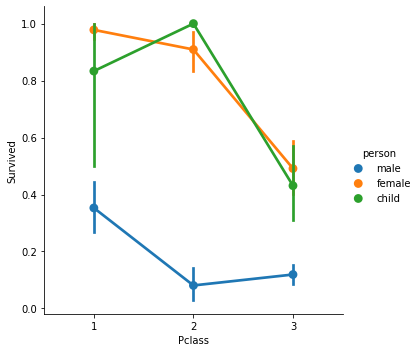

In [73]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)
# The survival rates for women and children have been way higher across all classes than those of men. Also, class 3 has the
# lowest of the survival rates for all persons.

#### Can age have an effect on survival?

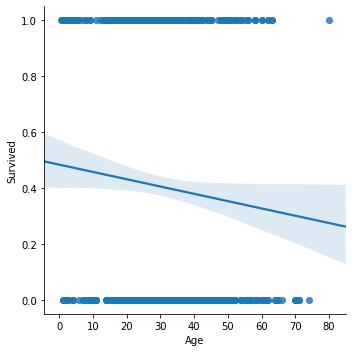

In [81]:
sns.lmplot('Age','Survived',data=titanic_df)

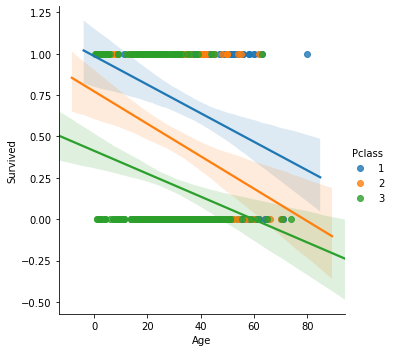

In [84]:
# Using class and age as hues to dig deeper
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')

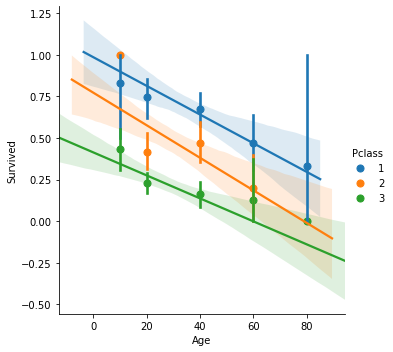

In [85]:
# Using ages to visualize standard deviations
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',x_bins=generations)
# Older ages have higher standard deviations on survival.

#### Relationship of age and gender on survival rates

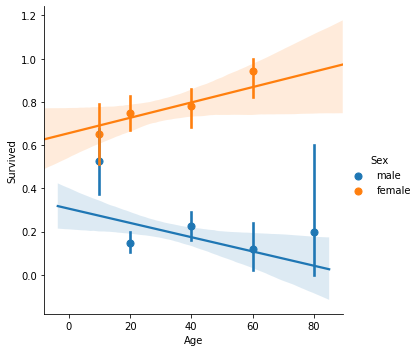

In [87]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex',x_bins=generations)

#### Does the deck have an effect on the survival rate?

In [95]:
cabin_df.insert(1,'survived',titanic_df['Survived'])
cabin_df

,Cabin,survived,Survived
0,C,0,0
1,C,1,1
2,E,1,1
3,G,1,1
4,C,0,0
...,...,...,...
199,D,0,0
200,B,0,0
201,C,0,0
202,B,0,0


In [97]:
cabin_df.drop('survived',axis=1)

,Cabin,Survived
0,C,0
1,C,1
2,E,1
3,G,1
4,C,0
...,...,...
199,D,0
200,B,0
201,C,0
202,B,0


C:\Users\spars\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


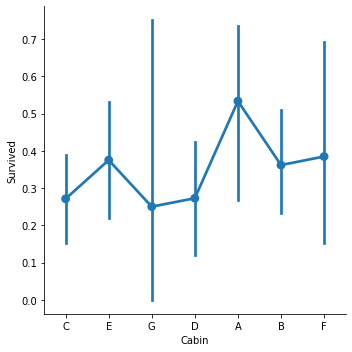

In [98]:
sns.factorplot('Cabin','Survived',data=cabin_df)
# Being in cabin 'A' increased the survival rates significantly.

#### Does being alone or with family effect the chances of survival?

C:\Users\spars\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


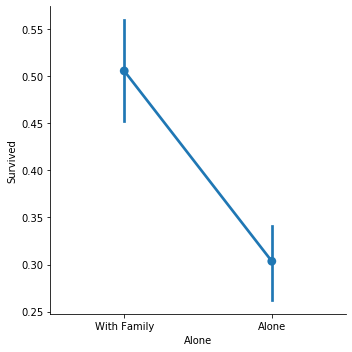

In [99]:
sns.factorplot('Alone','Survived',data=titanic_df)

C:\Users\spars\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


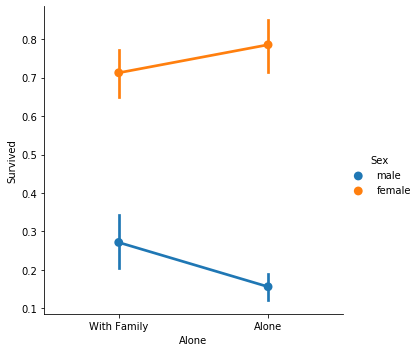

In [100]:
# Using gender as a hue
sns.factorplot('Alone','Survived',hue='Sex',data=titanic_df)
# Being a female who was alone had the highest chances of survival. However, males who were alone were the least likely
# to survive. 